In [51]:
%load_ext autoreload
%autoreload 2

import sys
sys.path.append("..") 

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.subplots as ps
import plotly.graph_objects as go

import src.preprocessing as pp

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [52]:
dfi = pd.read_csv('../data/train.csv').drop('Id', axis=1)
dfi_test = pd.read_csv('../data/test.csv').drop('Id', axis=1)

print('Train set shape: ', dfi.shape)
print('Test set shape: ', dfi_test.shape)
dfi.head(15)

Train set shape:  (1460, 80)
Test set shape:  (1459, 79)


,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
5,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
7,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
8,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900
9,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,1,2008,WD,Normal,118000


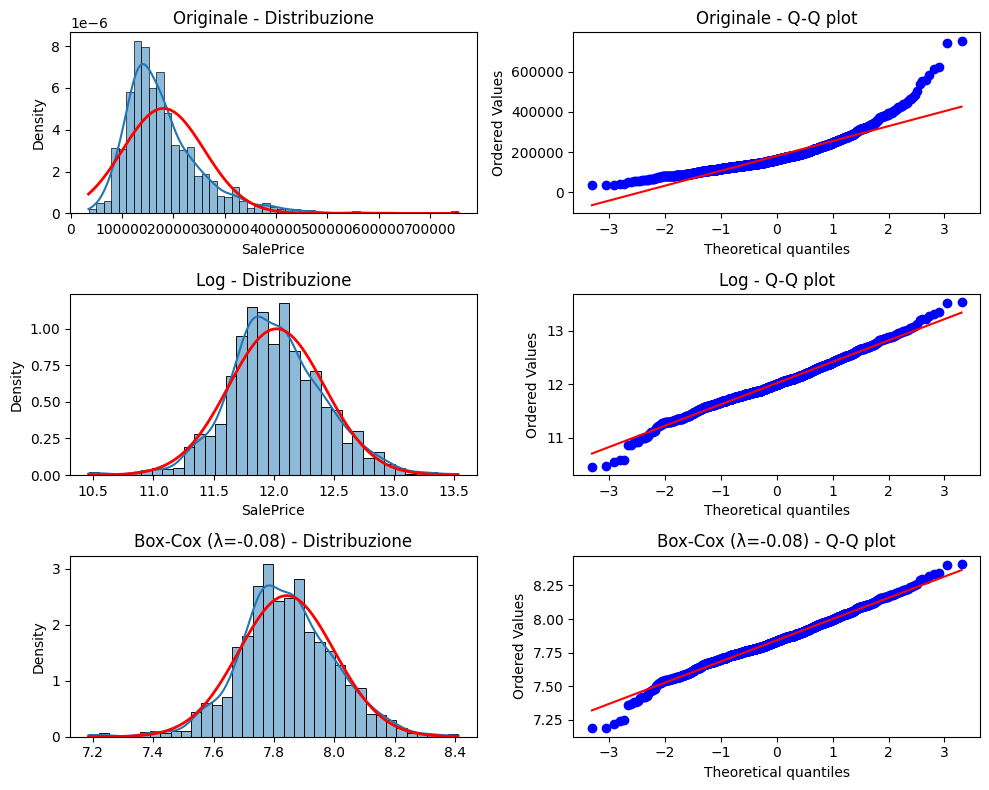

In [53]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import norm, boxcox, yeojohnson, probplot

# Colonna dei dati
data = dfi['SalePrice']

# Trasformazioni
log_data = np.log1p(data)
boxcox_data, lambda_bc = boxcox(data)          # Box-Cox richiede valori > 0
yj_data, lambda_yj = yeojohnson(data)

datasets = {
    "Originale": data,
    "Log": log_data,
    f"Box-Cox (λ={lambda_bc:.2f})": boxcox_data,
}

fig, axes = plt.subplots(len(datasets), 2, figsize=(10, 8))

for i, (name, values) in enumerate(datasets.items()):
    # Istogramma + curva normale
    sns.histplot(values, kde=True, stat="density", ax=axes[i,0])
    mu, sigma = norm.fit(values)
    x = np.linspace(min(values), max(values), 100)
    axes[i,0].plot(x, norm.pdf(x, mu, sigma), 'r', lw=2)
    axes[i,0].set_title(f"{name} - Distribuzione")
    
    # Q-Q plot
    probplot(values, dist="norm", plot=axes[i,1])
    axes[i,1].get_lines()[1].set_color('red')  # linea di riferimento in rosso
    axes[i,1].set_title(f"{name} - Q-Q plot")

plt.tight_layout()
plt.show()


## 1. Missing values

In [54]:
dfm = pp.fill_na(dfi)
dfm_test = pp.fill_na(dfi_test)

In [55]:
null_col = dfm.isnull().sum()
null_col[null_col > 0].sort_values(ascending=False)

Series([], dtype: int64)

In [56]:
null_col = dfm_test.isnull().sum()
null_col[null_col > 0].sort_values(ascending=False)

Series([], dtype: int64)

## 2. Data Exploration

In [57]:
pp.hist_matrix(dfm)

## 3. Feature Engineering

In [59]:
dfm['MSSubClass'] = dfm['MSSubClass'].map(lambda x: str(x))
dfe = pp.engineer_features(dfm)
dfe_test = pp.engineer_features(dfm_test)

### 3.1 Skew

In [60]:
from scipy import stats

skews = dfe.select_dtypes(exclude='object').apply(lambda x: stats.skew(x))
skewed_features = skews[abs(skews) > 0.5].index.tolist()
print(skewed_features)

['LotFrontage', 'LotArea', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'HalfBath', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'SalePrice', 'TotalSF', 'TotalPorchSF', 'QualArea', 'CondArea', 'HouseAge', 'RemodAge', 'HasBasement', 'HasGarage', 'HasPool']


In [61]:
# pp.plot_log(dfe, skewed_features, cols=2)

## 4. Feature Transformation

In [62]:
dft = pp.transform_attributes(dfe)
dft_test = pp.transform_attributes(dfe_test)

/Users/gianlucaascari/Documents/university/internship/torch_study/1-house-prices-comp/notebooks/../src/preprocessing.py:222: FutureWarning:

Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`

/Users/gianlucaascari/Documents/university/internship/torch_study/1-house-prices-comp/notebooks/../src/preprocessing.py:221: FutureWarning:

Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`

/Users/gianlucaascari/Documents/university/internship/torch_study/1-house-prices-comp/notebooks/../src/preprocessing.py:299: FutureWarning:

Downcasting behavior in `replace` is deprecated and w

In [63]:
from sklearn.model_selection import train_test_split

X = dft.drop('SalePrice', axis=1)
y = dft['SalePrice']

X_train, X_val, y_train, y_val = train_test_split(X, y, shuffle=True, random_state=21)

X_test = dft_test.copy()

### 4.1 Validation Datasets

In [64]:
from category_encoders import TargetEncoder

enc = TargetEncoder(return_df=True)
X_train_enc = enc.fit_transform(X_train, y_train)
X_val_enc = enc.transform(X_val)

df_train = X_train_enc.copy()
df_train['SalePrice'] = y_train

df_val = X_val_enc.copy()
df_val['SalePrice'] = y_val

### 4.2 Test Datasets

In [65]:
from category_encoders import TargetEncoder

enc = TargetEncoder(return_df=True)
X_enc = enc.fit_transform(X, y)
X_test_enc = enc.transform(X_test)

df = X_enc.copy()
df['SalePrice'] = y

df_test = X_test_enc.copy()

### 4.3 Log Encoding

In [66]:
skewed_features = ['LotArea', '1stFlrSF', '2ndFlrSF', 'TotalBsmtSF','TotalSF', 'CondArea', 'QualArea', 'GrLivArea', 'LotFrontage']
# skewed_features.remove('SalePrice')

In [67]:
import plotly.subplots as ps
import plotly.graph_objects as go

original_features = df[skewed_features]
log_features, _ = pp.log_features_comp(original_features, skewed_features, mode='log')
# box_features, _ = pp.log_features_comp(original_features, skewed_features, mode='box')
yeo_features, _ = pp.log_features_comp(original_features, skewed_features, mode='yeo')

titles = np.array([[f'{col}', f'{col} log', f'{col} yeo'] for col in skewed_features]).flatten()

fig = ps.make_subplots(rows=len(skewed_features), cols=3, subplot_titles=titles)

for i, attr in enumerate(skewed_features):
    fig.add_trace(go.Histogram(x=original_features[attr], nbinsx=100), row=i+1, col=1)
    fig.add_trace(go.Histogram(x=log_features[attr], nbinsx=100), row=i+1, col=2)
    # fig.add_trace(go.Histogram(x=box_features[attr], nbinsx=100), row=i+1, col=3)
    fig.add_trace(go.Histogram(x=yeo_features[attr], nbinsx=100), row=i+1, col=3)
    
fig.update_layout(
    height=150 + 100*len(skewed_features),
    width= 800
)
fig.show()

In [68]:
## Something goes wrong here
dfl_train, lmbdas_train = pp.log_features_comp(df_train, skewed_features)
dfl_val = pp.log_features_pre_comp(df_val, skewed_features, lmbdas_train)

dfl, lmbdas = pp.log_features_comp(df, skewed_features)
dfl_test = pp.log_features_pre_comp(df_test, skewed_features, lmbdas)

### 4.4 BoxCox

In [69]:
import numpy as np
from scipy.stats import boxcox, boxcox_normmax

attr = 'SalePrice'

lambda_opt_train = boxcox_normmax(dfl_train[attr].values)
dfl_train[attr] = boxcox(dfl_train[attr].values, lambda_opt_train)
dfl_val[attr] = boxcox(dfl_val[attr].values, lambda_opt_train)

# Trasformazione + stima lambda
lambda_opt = boxcox_normmax(dfl[attr].values)
dfl[attr] = boxcox(dfl[attr].values, lambda_opt)

# --- Salvataggio ---
np.savez("../data/boxcox_params.npz", lambda_bc=lambda_opt)

dfl.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,QualArea,CondArea,HouseAge,RemodAge,HasBasement,HasGarage,HasFireplace,HasPool,Has2ndFloor,SalePrice
0,240403.542087,191037.422977,16.395858,10.921323,181142.598485,183468.337966,0,180183.746758,180962.728895,176930.614653,...,24.637038,17.033442,5,5,1,1,0,0,1,8.925885
1,185224.811567,191037.422977,18.567504,11.105857,181142.598485,183468.337966,0,180183.746758,180962.728895,178123.390290,...,22.242904,17.566125,31,31,1,1,1,0,0,8.854652
2,240403.542087,191037.422977,16.846665,11.336574,181142.598485,183468.337966,1,180183.746758,180962.728895,176930.614653,...,24.874841,17.171719,7,6,1,1,1,0,1,8.961366
3,167027.110436,191037.422977,15.623485,11.098286,181142.598485,183468.337966,1,180183.746758,180962.728895,181705.958015,...,24.659299,17.046400,91,36,1,1,1,0,1,8.719844
4,240403.542087,191037.422977,19.115196,11.684244,181142.598485,183468.337966,1,180183.746758,180962.728895,178123.390290,...,26.806397,17.842437,8,8,1,1,1,0,1,9.018308


## 5. Normalization

In [70]:
pp.compute_norm_values_and_save(dfl_train, 'val')
dfn_train = pp.normalize(dfl_train, 'val')
dfn_val = pp.normalize(dfl_val, 'val')

In [71]:
pp.compute_norm_values_and_save(dfl, 'test')
dfn = pp.normalize(dfl, 'test')
dfn_test = pp.normalize(dfl_test, 'test')

## 6. Save

In [74]:
dfn_train.to_csv('../data/preprocessed/dfn_train.csv', index=False)
dfn_val.to_csv('../data/preprocessed/dfn_val.csv', index=False)
dfn.to_csv('../data/preprocessed/dfn.csv', index=False)
dfn_test.to_csv('../data/preprocessed/dfn_test.csv', index=False)